In [3]:
import numpy

In [5]:
import pandas

In [6]:
sleep = pandas.read_csv('sleep.csv')

주피터 노트북이 돌아가는 폴더

In [7]:
import os

In [8]:
print(os.getcwd())

C:\Users\eupho\Dropbox\@강의\데잇걸즈


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
x = sleep[['group']]
y = sleep['extra']
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 로지스틱 선형 모형

In [12]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [26]:
type(sleep['extra'])

pandas.core.series.Series

In [36]:
x = sleep[['extra']]  # 수면 시간으로 (괄호가 2개 들어가는 이유는 표 형식이어야 해서
y = sleep['group']    # 그룹을 예측
model.fit(x, y)

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
model.coef_  # 수면 시간이 길 수록 그룹2일 확률이 높아진다

array([[0.38870779]])

In [38]:
sleep.groupby('group').agg({'extra': numpy.mean})

,extra
group,
1,0.75
2,2.33


## 실습: 위의 로지스틱 선형 모형의 계수(coef_)의 95% 신뢰구간

In [39]:
from sklearn.utils import resample

In [41]:
coefs = []
for _ in range(10000):
    df = resample(sleep)
    x = df[['extra']]
    y = df['group']
    
    model = LogisticRegression(solver='lbfgs')
    model.fit(x, y)
    coefs.append(model.coef_)

In [42]:
import seaborn

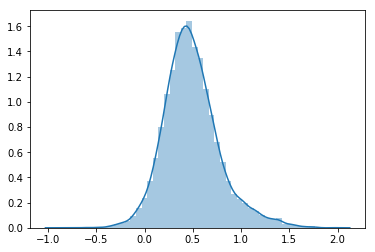

In [45]:
seaborn.distplot(coefs)

In [46]:
numpy.quantile(coefs, [.025, .975])

array([-0.01945436,  1.18779149])

In [48]:
1680/84

20.0

## 두 그룹의 수면 시간 차이

In [51]:
stat = sleep.groupby('group').mean() 

In [54]:
stat

,Unnamed: 0,extra,ID
group,,,
1,5.5,0.75,5.5
2,15.5,2.33,5.5


In [55]:
diff = stat.loc[2, 'extra'] - stat.loc[1, 'extra']

In [57]:
diff  # 2번 그룹 수면시간 평균 - 1번 그룹 수면시간 평균

1.5799999999999996

pandas에 loc과 iloc

- loc: 이름으로 위치를 지정
- iloc: ~번째로 위치를 지정

In [92]:
diffs = []
for _ in range(30000):
    s = resample(sleep['extra'])
    d = s.iloc[0:10].mean()  - s.iloc[10:20].mean()
    diffs.append(d)

In [95]:
numpy.quantile(diffs, [.025, .975])  # 95% 신뢰구간 = 신뢰수준 95% = 유의수준 5%

array([-1.71025,  1.72   ])

In [96]:
numpy.quantile(diffs, [.005, .995])  # 99% 신뢰구간 = 유의수준 1%

array([-2.23,  2.23])

In [88]:
import random

In [89]:
diffs = []
for _ in range(30000):
    s = list(sleep['extra'])
    random.shuffle(s)
    d = numpy.mean(s[0:10])  - numpy.mean(s[10:20])
    diffs.append(d)

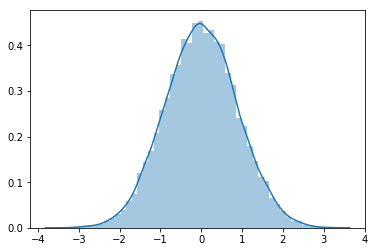

In [83]:
seaborn.distplot(diffs)

In [90]:
numpy.quantile(diffs, [.025, .975])

array([-1.74,  1.76])

In [91]:
numpy.quantile(diffs, .95)

1.4800000000000004

In [86]:
diff

1.5799999999999996